# 特徵分析 文章發佈時間
透過 pandas/numpy/matplotlib 觀察文章發佈時間的分布 與 Label 之間的關係

### 基本 Import 套件下載

In [ ]:
!pip install pandas
!pip install sklearn
!pip install numpy
!pip install -U matplotlib

In [1]:
import pandas as pd
import numpy as np

### 載入資料

In [2]:
train_df = pd.read_csv('../../raw_data/intern_homework_train_dataset.csv')
test_df = pd.read_csv('../../raw_data/intern_homework_public_test_dataset.csv')
private_test_df = pd.read_csv('../../raw_data/intern_homework_private_test_dataset.csv')
train_df.head()

,title,created_at,like_count_1h,like_count_2h,like_count_3h,like_count_4h,like_count_5h,like_count_6h,comment_count_1h,comment_count_2h,comment_count_3h,comment_count_4h,comment_count_5h,comment_count_6h,forum_id,author_id,forum_stats,like_count_24h
0,我的排骨湯,2022-10-05 14:20:21 UTC,12,15,15,15,16,18,10,10,10,10,10,10,598518,428921,0.7,26
1,#請益 婚禮穿搭,2022-10-05 14:28:13 UTC,0,0,3,4,4,4,2,5,8,9,9,9,399302,650840,63.9,11
2,無謂的啦啦隊,2022-10-06 07:18:22 UTC,3,7,8,11,12,14,1,1,2,3,3,3,650776,717288,19.2,19
3,文學理論 課本,2022-09-20 11:39:14 UTC,2,7,11,24,26,26,2,2,8,32,38,63,471023,173889,7.9,29
4,一般課程,2022-09-05 10:18:24 UTC,3,7,7,10,10,11,15,26,35,38,48,49,230184,594332,36.2,16


### 資料前處理

In [3]:
train_df = train_df.loc[:, ['created_at', 'like_count_24h']]
test_df = test_df.loc[:, ['created_at', 'like_count_24h']]
private_test_df = private_test_df.loc[:, ['created_at']]
train_df.head()

,created_at,like_count_24h
0,2022-10-05 14:20:21 UTC,26
1,2022-10-05 14:28:13 UTC,11
2,2022-10-06 07:18:22 UTC,19
3,2022-09-20 11:39:14 UTC,29
4,2022-09-05 10:18:24 UTC,16


將 created_at 格式 改為 timestamp 格式  (year-month-day hour:minute:second)

In [5]:
train_df['timestamp'] = pd.to_datetime(train_df['created_at'], utc=True)
test_df['timestamp'] = pd.to_datetime(test_df['created_at'], utc=True)
private_test_df['timestamp'] = pd.to_datetime(private_test_df['created_at'], utc=True)
train_df.head()

,created_at,like_count_24h,timestamp
0,2022-10-05 14:20:21 UTC,26,2022-10-05 14:20:21+00:00
1,2022-10-05 14:28:13 UTC,11,2022-10-05 14:28:13+00:00
2,2022-10-06 07:18:22 UTC,19,2022-10-06 07:18:22+00:00
3,2022-09-20 11:39:14 UTC,29,2022-09-20 11:39:14+00:00
4,2022-09-05 10:18:24 UTC,16,2022-09-05 10:18:24+00:00


### 資料觀察

觀察 train/test/private test 發佈時間的分佈

年

In [6]:
# 觀察 年份
train_year = train_df['timestamp'].dt.year.unique()
test_year = test_df['timestamp'].dt.year.unique()
private_year = private_test_df['timestamp'].dt.year.unique()
print(" year in train data = ",train_year)
print(" year in test data = ",test_year)
print(" year in private_test data = ",private_year)

 year in train data =  [2022]
 year in test data =  [2022]
 year in private_test data =  [2023]


月

In [7]:
# 觀察 月份
train_month = train_df['timestamp'].dt.month.unique()
test_month = test_df['timestamp'].dt.month.unique()
private_month = private_test_df['timestamp'].dt.month.unique()
print(" month in train data = ",train_month)
print(" month in test data = ",test_month)
print(" month in private_test data = ",private_month)

 month in train data =  [10  9]
 month in test data =  [12 11]
 month in private_test data =  [2 1]


日

In [8]:
# 觀察 日期
train_day = train_df['timestamp'].dt.day.unique()
test_day = test_df['timestamp'].dt.day.unique()
private_day = private_test_df['timestamp'].dt.day.unique()
print(" day in train data = ",sorted(train_day))
print(" day in test data = ",sorted(test_day))
print(" day in private_test data = ",sorted(private_day))

 day in train data =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
 day in test data =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
 day in private_test data =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


星期 (Monday = 0, Sunday = 6)

In [9]:
# 觀察 屬於星期幾
train_weekday = train_df['timestamp'].dt.weekday.unique()
test_weekday = test_df['timestamp'].dt.weekday.unique()
private_weekday = private_test_df['timestamp'].dt.weekday.unique()
print(" The day of the week in train data = ",sorted(train_weekday))
print(" The day of the week in test data = ",sorted(test_weekday))
print(" The day of the week in private_test data = ",sorted(private_weekday))

 The day of the week in train data =  [0, 1, 2, 3, 4, 5, 6]
 The day of the week in test data =  [0, 1, 2, 3, 4, 5, 6]
 The day of the week in private_test data =  [0, 1, 2, 3, 4, 5, 6]


小時

In [10]:
# 觀察 幾點發佈文章
train_hour = train_df['timestamp'].dt.hour.unique()
test_hour = test_df['timestamp'].dt.hour.unique()
private_hour = private_test_df['timestamp'].dt.hour.unique()
print(" hour in train data = ",sorted(train_hour))
print(" hour in test data = ",sorted(test_hour))
print(" hour in private_test data = ",sorted(private_hour))

 hour in train data =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
 hour in test data =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
 hour in private_test data =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


### 資料分析 (Train Dataset)

針對文章何時發佈 與 文章累積愛心數(Label)的關係 進行分析

分析一周內，在星期幾發佈文章能累積到的愛心數會最多

In [11]:
train_weekdays = train_df['timestamp'].dt.weekday
target = train_df['like_count_24h']

In [13]:
# 取得 train_weekdays 中所有的獨立天數 (0 代表 星期一， 6 代表 星期日)
weekdays = np.unique(train_weekdays)
weekdays

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [21]:
# 計算 禮拜幾 對應的 label 平均值
mean_label_values = [np.mean(target[train_weekdays == i]) for i in weekdays]
mean_label_values

[44.23733180647008,
 41.509726027397264,
 41.74633328677189,
 47.06588380716934,
 44.579036238472526,
 49.94232812262862,
 47.88246721709568]

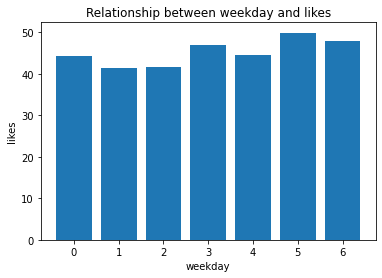

In [24]:
# 繪製 bar 圖
import matplotlib.pyplot as plt

# 設定圖片標題和軸標籤
fig = plt.gcf()
fig.patch.set_facecolor('white')
plt.title('Relationship between weekday and likes')
plt.xlabel('weekday')
plt.ylabel('likes')
plt.bar(weekdays, mean_label_values)
plt.savefig('weekday_likes_relationship.png')

分析一天內，在幾點發佈文章能累積到的愛心數會最多

In [16]:
train_hours = train_df['timestamp'].dt.hour
target = train_df['like_count_24h']

In [17]:
hours = np.unique(train_hours)
hours

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [25]:
# 計算 幾點 對應的 label 平均值
mean_label_values = [np.mean(target[train_hours == i]) for i in hours]
mean_label_values

[38.60815402038505,
 43.57735011102887,
 48.84759916492693,
 41.21453138435081,
 48.54094579008074,
 45.833090909090906,
 46.58767072720561,
 46.047309498013725,
 42.48750946252839,
 48.28932178932179,
 45.874150875938504,
 45.39677532422012,
 45.57400346620451,
 40.47008274984086,
 43.00029797377831,
 37.08437404812671,
 44.79598775926556,
 48.43251957623215,
 48.07142857142857,
 51.93457943925234,
 46.46771037181996,
 45.504731861198735,
 49.98677248677249,
 83.40684410646388]

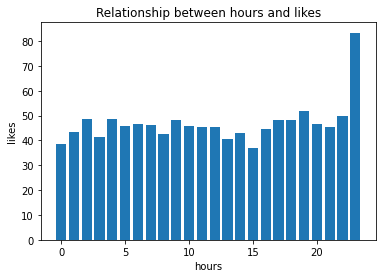

In [26]:
# 繪製 bar 圖
import matplotlib.pyplot as plt

# 設定圖片標題和軸標籤
fig = plt.gcf()
fig.patch.set_facecolor('white')
plt.title('Relationship between hours and likes')
plt.xlabel('hours')
plt.ylabel('likes')
plt.bar(hours, mean_label_values)
plt.savefig('hours_likes_relationship.png')